<a href="https://colab.research.google.com/github/GM-10/MNIST-Digit-Prediction/blob/main/MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project-2

Import packages

In [ ]:
import keras
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Visualization


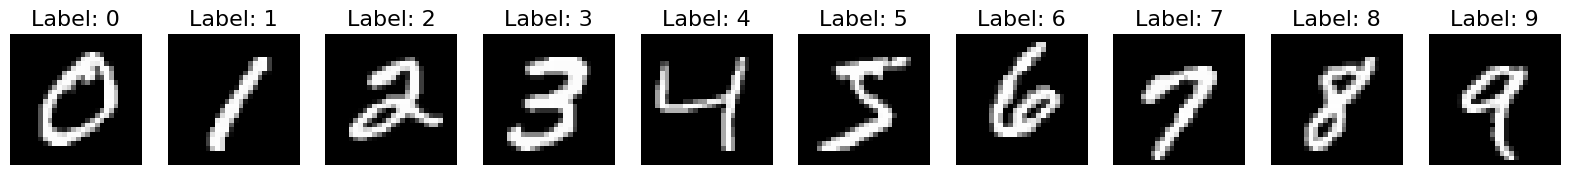

In [ ]:
num_classes=10
f,ax =plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
  ax[i].axis('off')

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


Converting labels to One-hot encoding


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test= keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Reshaping data

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train=x_train.reshape(x_train.shape[0], 28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)

(60000, 28, 28, 1)


Building Basic CNN model

In [ ]:
model= Sequential() #2 convolution layers, 2 pooling layers and 2 fully connected layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) #default learning rate=0.01

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Train

In [ ]:
batch_size=256
epochs=10
history=model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 51s 210ms/step - accuracy: 0.7923 - loss: 0.6950 - val_accuracy: 0.9785 - val_loss: 0.0676
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.9724 - loss: 0.0910 - val_accuracy: 0.9801 - val_loss: 0.0612
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 206ms/step - accuracy: 0.9812 - loss: 0.0633 - val_accuracy: 0.9876 - val_loss: 0.0374
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 200ms/step - accuracy: 0.9857 - loss: 0.0453 - val_accuracy: 0.9883 - val_loss: 0.0315
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 210ms/step - accuracy: 0.9889 - loss: 0.0377 - val_accuracy: 0.9905 - val_loss: 0.0300
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 203ms/step - accuracy: 0.9893 - loss: 0.0350 - val_accuracy: 0.9909 - val_loss: 0.0274
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 202ms/step - accuracy: 0.9914 - loss: 0.0285 - val_accuracy: 0.9918 - val_loss: 0.0257
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 206ms/step - accuracy: 0.9918 - loss: 0

Evaluating the model

In [ ]:
loss, acc =model.evaluate(x_test, y_test)
print("Test Loss: {}, Test_accuracy:{} ".format(loss,acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9902 - loss: 0.0336
Test Loss: 0.026102764531970024, Test_accuracy:0.9922999739646912 


Visualizing The Training Process

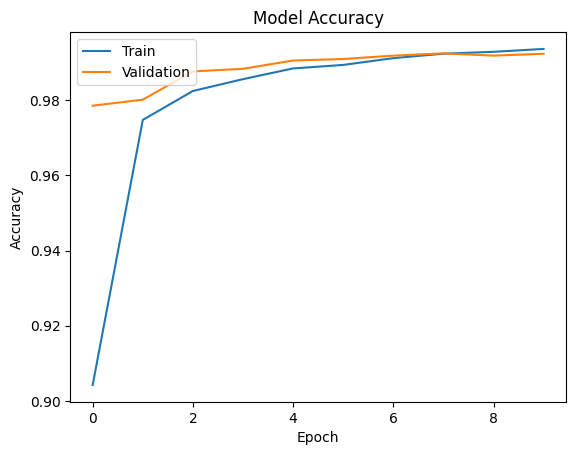

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

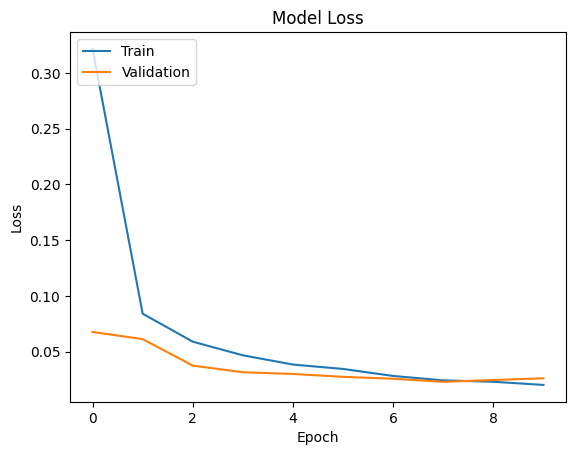

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred= model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
[[3.3544101e-10 1.0497304e-09 4.2286082e-08 ... 9.9999970e-01
  2.9109193e-09 2.7722916e-07]
 [7.8326195e-08 4.4261478e-06 9.9999529e-01 ... 6.8048761e-12
  1.6189164e-08 9.3643992e-14]
 [1.3429687e-08 9.9998575e-01 8.6591768e-08 ... 6.6494745e-06
  8.4605603e-07 7.1012858e-09]
 ...
 [1.4736571e-14 2.3680107e-09 5.7461626e-13 ... 4.4391454e-10
  4.8792295e-08 4.8229434e-09]
 [6.1951590e-07 6.8405602e-12 3.2861813e-13 ... 2.8621093e-11
  2.8431945e-05 7.8831476e-11]
 [2.8166275e-10 1.9913918e-10 1.8510629e-09 ... 1.8963339e-16
  9.8881459e-10 7.0693261e-14]]
[7 2 1 ... 4 5 6]


Choosing random set to test the model

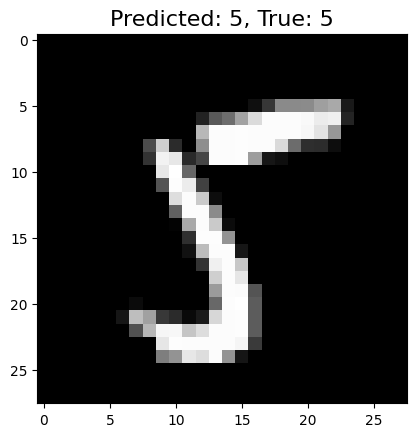

In [ ]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true= np.argmax(y_test, axis=1)
y_sample_true=y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true),fontsize=16)
plt.imshow(x_sample.reshape((28,28)), cmap='gray')

Confusion Matrix to visualize errors

Text(0.5, 1.0, 'Confusion Matrix')

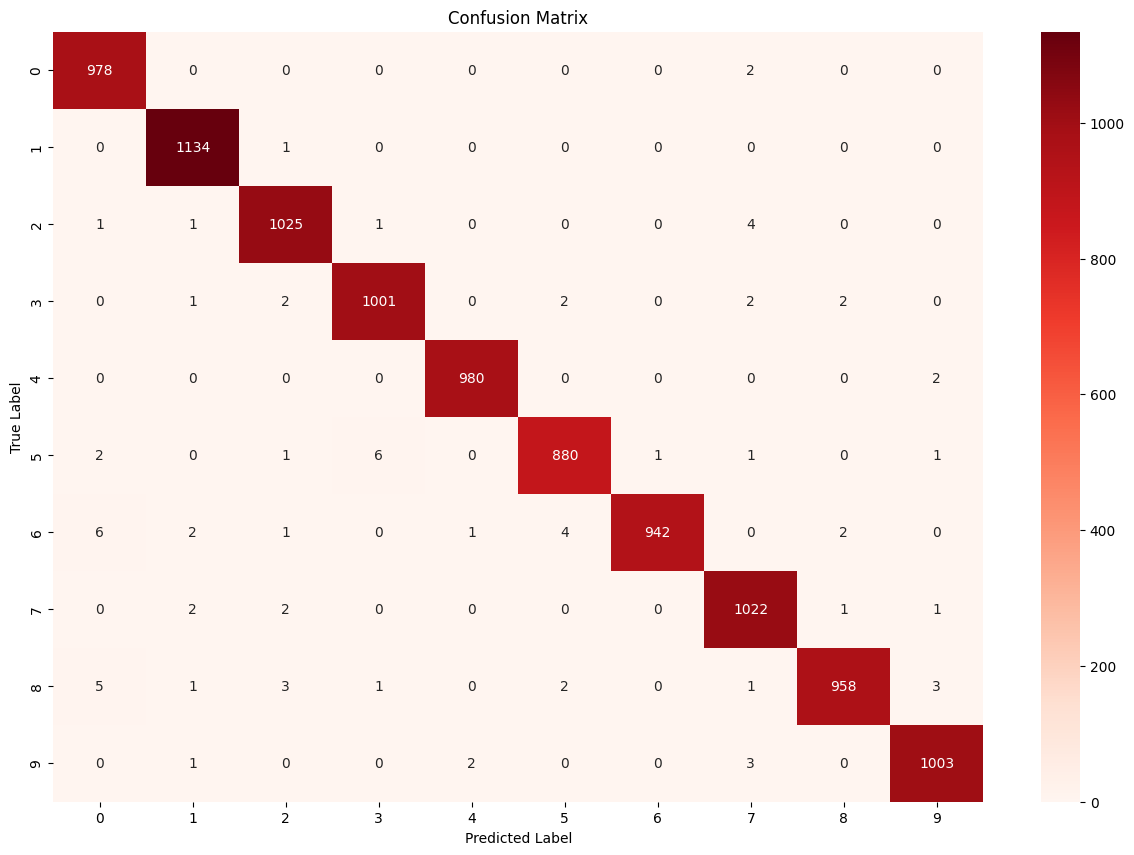

In [ ]:
confusion_mtx= confusion_matrix(y_true,y_pred_classes)

fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap="Reds")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

Predicting errors for 10 digits

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=0)
# Check if the result of np.take is 1-dimensional
taken_array = np.take(y_pred_errors, y_true_errors, axis=0)
if taken_array.ndim < 2:
    # If 1-dimensional, convert to 2D array with one row
    true_probability_errors = np.diagonal(taken_array[np.newaxis, :])
else:
    true_probability_errors = np.diagonal(taken_array)
diff_errors = y_pred_errors_probability - true_probability_errors
sorted_idx_diff_errors = np.argsort(diff_errors)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

Analyzing number with most misprediction

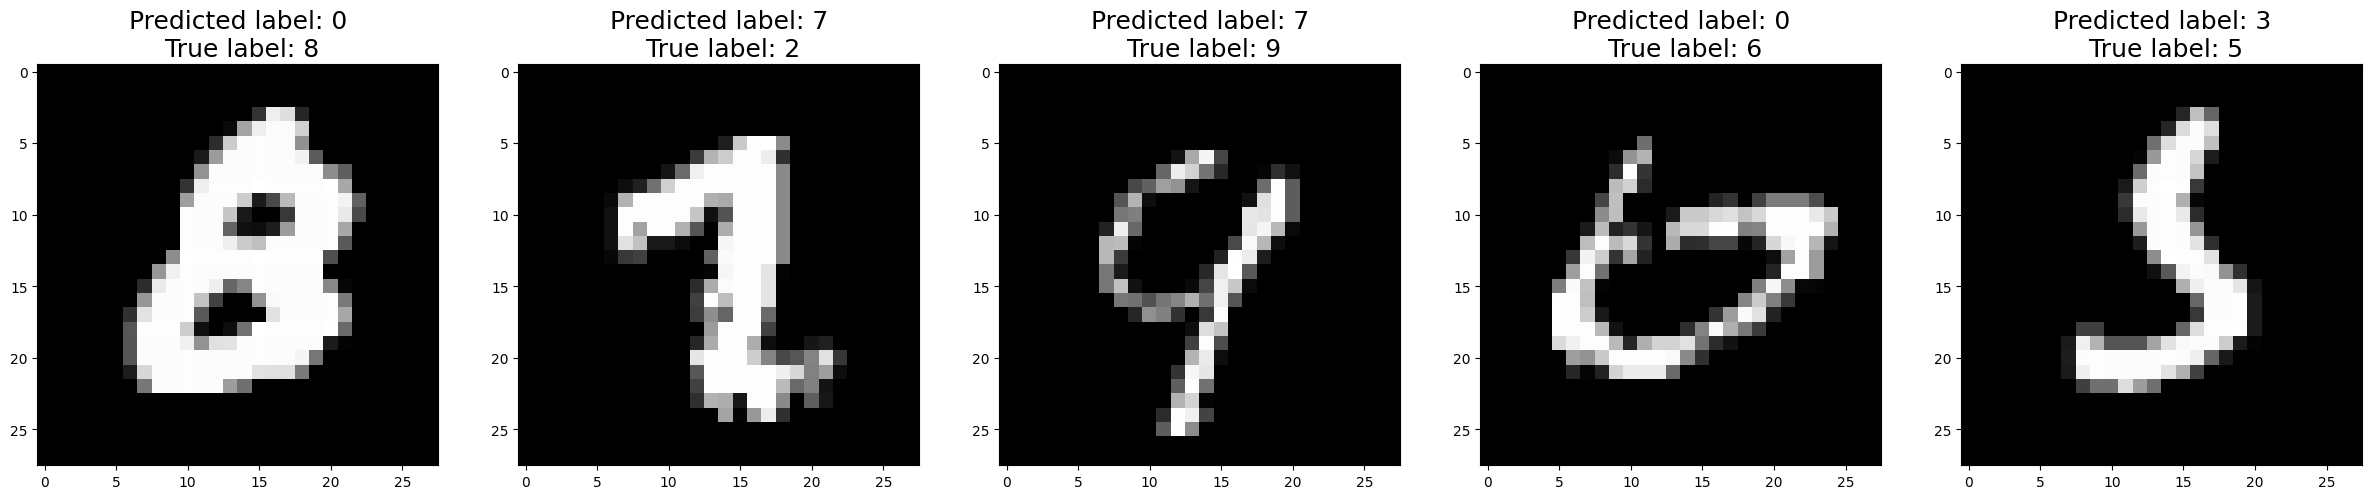

In [ ]:
num=len(top_idx_diff_errors)
# If num is 1, create a single subplot without squeezing
if num == 1:
    fig, ax = plt.subplots(figsize=(30, 30))  # or fig, ax = plt.subplots(1, 1, figsize=(30, 30), squeeze=False)
    # Access the Axes object directly (no need for indexing)
    ax.imshow(sample, cmap='gray')
    ax.set_title("Predicted label: {}\n True label: {}".format(y_p, y_t), fontsize=18)
else:
    # For num > 1, create multiple subplots and iterate using indexing
    fig, ax = plt.subplots(1, num, figsize=(30, 30))
    for i in range(0, num):
        idx = top_idx_diff_errors[i]
        sample = x_test_errors[idx].reshape(28, 28)
        y_t = y_true_errors[idx]
        y_p = y_pred_classes_errors[idx]
        ax[i].imshow(sample, cmap='gray')
        ax[i].set_title("Predicted label: {}\n True label: {}".format(y_p, y_t), fontsize=18)